In [44]:
# Brenden Collins // Nate Novak
# CS 7180: Advanced Computer Perception
# Fall 2022
# Perform dimension reduction and clustering analyses on encoded sentence data 


import numpy as np
import pandas as pd
#from sklearn.decomposition import PCA
import sklearn
import umap
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

from sklearn.cluster import SpectralClustering


In [52]:
# load data
cls_out = pd.read_csv("../data/encoded.csv")
#print(cls_out)
#print(cls_out.columns)

cls_out[["PhraseId", "SentenceId", "Phrase", "Sentiment"]].to_csv("../data/sentences.csv")

In [37]:


cls_np = np.array(cls_out.drop(["Unnamed: 0", "PhraseId", "SentenceId", "Phrase"], axis=1))
#print(f"cls_np shape: {cls_np.shape}")

sentiment = cls_np[:,0]
vector = cls_np[:,1:]
#print(sentiment)
#print(vector.shape)

# PCA on all sentences - CLS vector only
pca = sklearn.decomposition.PCA()
pca.fit(vector)
   
print(f"Num components: {pca.n_components_}")
print(f"First 30 axes variance: {pca.explained_variance_ratio_[:30]}")
test = np.array(pca.explained_variance_ratio_)[:20].sum()
print(f"Percent of variance in the first 20 axes: {test}")

# apply PCA to transform the vector
pca_transform = sklearn.decomposition.PCA(n_components=10)
vector_pca = pca_transform.fit_transform(vector)
display("Vector PCA shape:",vector_pca.shape)

print(f"Num components: {pca_transform.n_components_}")
print(f"First 10 axes variance: {pca_transform.explained_variance_ratio_[:10]}")
test2 = np.array(pca_transform.explained_variance_ratio_)[:10].sum()
print(f"Percent of variance in the first 10 axes: {test2}")





Num components: 768
First 30 axes variance: [0.15074945 0.06852164 0.05808154 0.04698769 0.03428877 0.02684235
 0.02658852 0.02351087 0.02003186 0.0182672  0.01796791 0.01685273
 0.01618979 0.01520185 0.01458799 0.01344161 0.01324682 0.01101448
 0.01096365 0.01003088 0.00924645 0.00894821 0.0082262  0.0081344
 0.00787949 0.00748749 0.0070331  0.00679123 0.00632444 0.00632179]
Percent of variance in the first 20 axes: 0.6133675843921128


'Vector PCA shape:'

(8529, 10)

Num components: 10
First 10 axes variance: [0.15074945 0.06852164 0.05808154 0.04698769 0.03428877 0.02684234
 0.02658851 0.02351086 0.02003165 0.01826652]
Percent of variance in the first 10 axes: 0.4738689727630059


In [38]:
reducer0 = umap.UMAP()
embedding0 = reducer0.fit_transform(vector_pca)

(8529, 2)

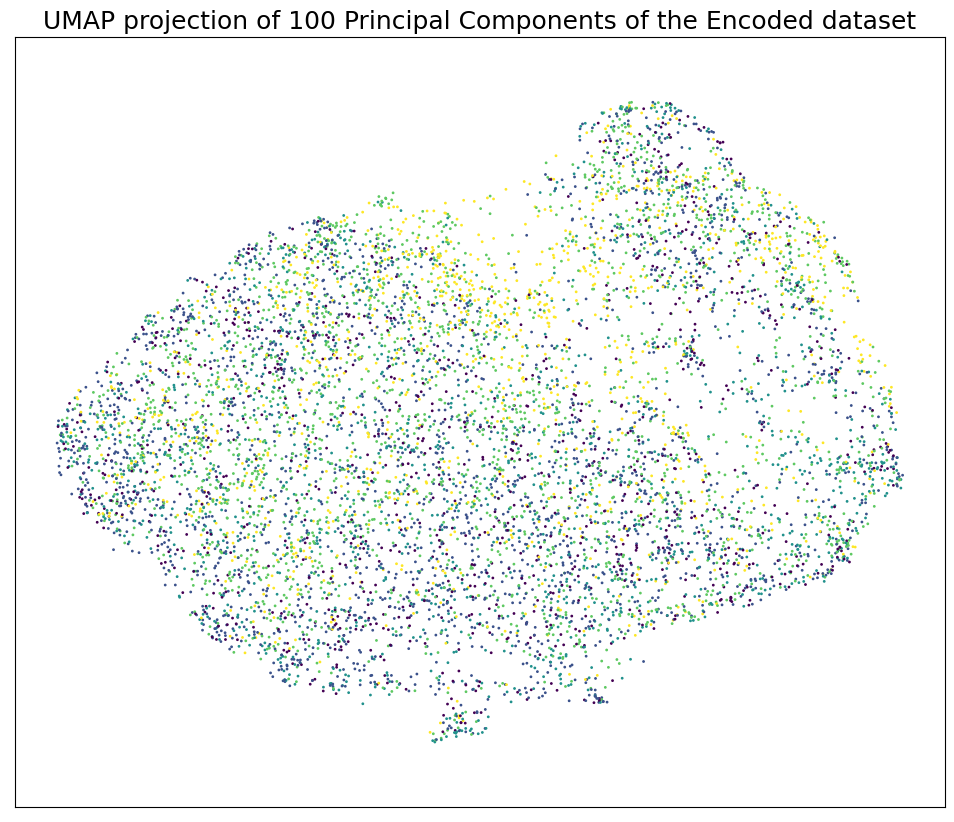

In [48]:
display(embedding0.shape)

# assign colors
colors = sentiment.astype(int)

fig, ax = plt.subplots(figsize=(12,10))

plt.scatter(
    embedding0[:, 0],
    embedding0[:, 1],
    s=1,
    c=colors,
    )
plt.gca().set_aspect('equal', 'datalim')
plt.setp(ax, xticks=[], yticks=[])
plt.title('UMAP projection of 100 Principal Components of the Encoded dataset', fontsize=18)

plt.show()

In [46]:
clustering = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=0).fit(vector_pca)
display(clustering.labels_)
clustering

array([0, 2, 2, ..., 1, 3, 2])

SpectralClustering(assign_labels='discretize', n_clusters=5, random_state=0)

(8529, 2)

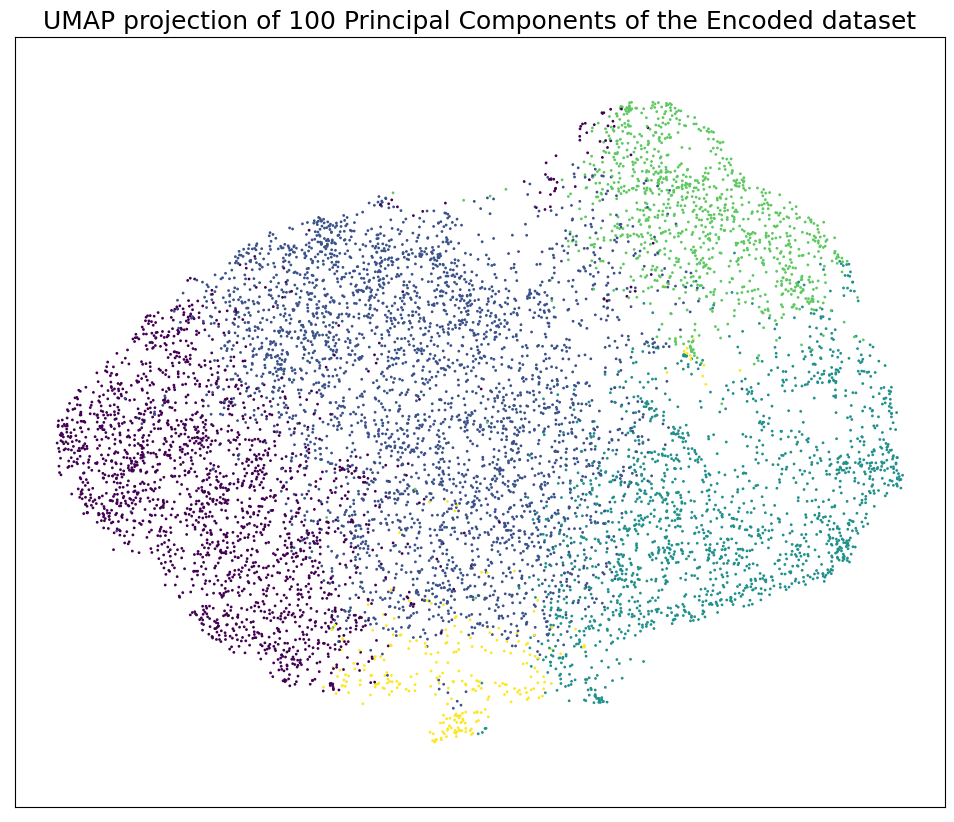

In [49]:
display(embedding0.shape)

# assign colors
colors = sentiment.astype(int)

fig, ax = plt.subplots(figsize=(12,10))

plt.scatter(
    embedding0[:, 0],
    embedding0[:, 1],
    s=1,
    c=clustering.labels_,
    )
plt.gca().set_aspect('equal', 'datalim')
plt.setp(ax, xticks=[], yticks=[])
plt.title('UMAP projection of 100 Principal Components of the Encoded dataset', fontsize=18)

plt.show()

In [4]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(vector)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


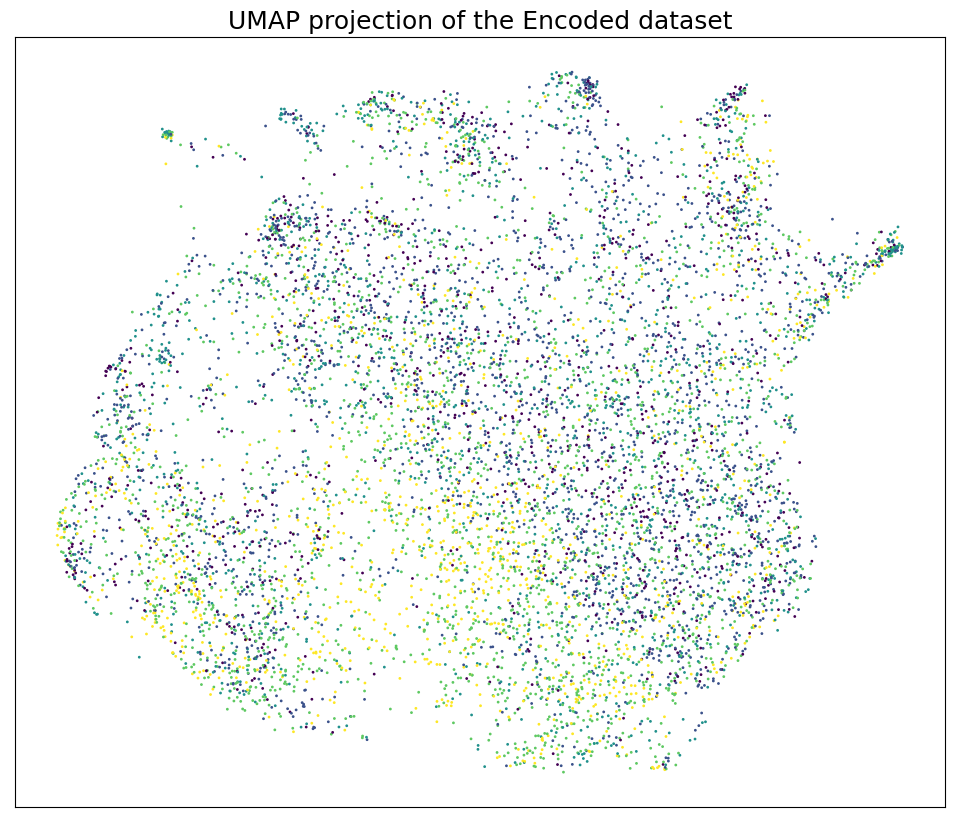

In [19]:
embedding.shape

# assign colors
colors = sentiment.astype(int)

fig, ax = plt.subplots(figsize=(12,10))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=1,
    c=colors,
    )
#plt.gca().set_aspect('equal', 'datalim')
plt.setp(ax, xticks=[], yticks=[])
plt.title('UMAP projection of the Encoded dataset', fontsize=18)

plt.show()

In [3]:
sklearn.neighbors.
